In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import altair as alt

In [2]:
def verify_nulls(data):
    nRows, _ = data.shape
    if data.isnull().any().any(): # Devuelve True si almenos uno es null
        print( "\n TABLA DE DATOS NULOS")
        tablaNulos = pd.DataFrame(pd.concat([
                                             data.isnull().any(), 
                                             data.isnull().sum(), 
                                             round(data.isnull().sum() / nRows * 100, 2), 
                                             data.dtypes], axis=1))
        tablaNulos.columns = ['Nulos', 'Cantidad', '%_Nulos', 'Tipo_Dato']
        tablaNulos.sort_values(by='%_Nulos', ascending = False, inplace = True)
        display(tablaNulos[tablaNulos['Cantidad'] > 0])
    else:
        print("No existen Nulos")

In [3]:
df_inv_med = pd.read_csv('data/inversionmedia.csv')
df_inv_med['Date']= pd.to_datetime(df_inv_med['Date'])
df_inv_med.sample(5)

,Date,Print,Other,Email,Radio,Facebook,Google,Pay TV,Open TV
32,2020-08-16,4000,1000,5000,1000,8000,11000,2000,0
77,2021-06-27,0,2000,3000,0,3000,1000,19000,10000
72,2021-05-23,1000,0,3000,0,3000,2000,32000,45000
74,2021-06-06,0,0,7000,1000,3000,14000,0,0
13,2020-04-05,2000,0,7000,1000,5000,6000,1000,0


In [4]:
verify_nulls(df_inv_med)

No existen Nulos


In [5]:
df_sales = pd.read_csv('data/sales.csv')
df_sales['Date']= pd.to_datetime(df_sales['Date'])
df_sales.sample(5)

,Date,Sales,NPS
13,2020-04-05,48208,32
8,2020-03-01,26335,62
39,2020-10-04,49674,59
42,2020-10-25,21444,61
62,2021-03-14,43164,60


In [6]:
verify_nulls(df_sales)

No existen Nulos


In [7]:
df_spe_sale = pd.read_csv('data/specialsale.csv')
df_spe_sale['Date']= pd.to_datetime(df_spe_sale['Date'])
df_spe_sale.sample(5)

,Date,Sales Name
4,2020-02-16,FHSD
7,2020-05-24,Pacman
23,2021-02-14,Valentine's Day
14,2020-10-11,Daussera sale
19,2021-01-03,Christmas & New Year Sale


In [8]:
verify_nulls(df_spe_sale)

No existen Nulos


In [9]:
# df_inv_comp = pd.read_csv('data/inversioncomp.csv')
# df_inv_comp.sample(5)

In [10]:
# verify_nulls(df_inv_comp)

In [11]:
# df_sector = pd.read_csv('data/sector.csv')
# df_sector.sample(5)

In [12]:
# verify_nulls(df_sector)

In [13]:
df_inv_med.eval('invTotal = Print + Other + Email + Radio + Facebook + Google + `Pay TV` + `Open TV`', inplace=True)
df_inv_med = pd.concat([df_inv_med, df_sales['Sales']], axis=1)
df_inv_med['ROI'] = round(df_inv_med['Sales']/df_inv_med['invTotal'], 4)
df_inv_med.sample(5)

,Date,Print,Other,Email,Radio,Facebook,Google,Pay TV,Open TV,invTotal,Sales,ROI
45,2020-11-15,0,1000,2000,0,16000,16000,20000,35000,90000,55611,0.6179
46,2020-11-22,0,3000,2000,0,9000,1000,15000,25000,55000,56932,1.0351
2,2020-01-19,0,0,1000,1000,8000,7000,2000,35000,54000,3680,0.0681
1,2020-01-12,0,0,2000,1000,4000,2000,2000,15000,26000,13493,0.5190
86,2021-08-29,4000,1000,3000,0,15000,19000,12000,26000,80000,115393,1.4424


In [14]:
df_inv_med.Sales.sum()

7596155

In [15]:
df_inv_med.invTotal.sum()

5781000

In [16]:
df_inv_med.Sales.sum()/df_inv_med.invTotal.sum()

1.3139863345441964

In [17]:
positive_ratio = df_inv_med.query('ROI >= 1').shape[0]
print(f'{positive_ratio} de las {df_inv_med.shape[0]} semanas hubo mejores ventas que inversion')

79 de las 104 semanas hubo mejores ventas que inversion


In [18]:
df_inv_med.describe().T

,count,mean,std,min,25%,50%,75%,max
Print,104.0,1721.153846,1748.545752,0.0000,0.0000,1000.00000,3000.000000,6000.0000
Other,104.0,1201.923077,1152.286100,0.0000,0.0000,1000.00000,2000.000000,5000.0000
Email,104.0,3509.615385,2207.644232,0.0000,2000.0000,3000.00000,5000.000000,7000.0000
Radio,104.0,480.769231,557.051343,0.0000,0.0000,0.00000,1000.000000,3000.0000
Facebook,104.0,8961.538462,4946.162731,1000.0000,5000.0000,9000.00000,12250.000000,17000.0000
Google,104.0,10865.384615,5466.682301,1000.0000,6000.0000,12000.00000,15250.000000,22000.0000
Pay TV,104.0,9778.846154,11701.760494,0.0000,1000.0000,5000.00000,15000.000000,55000.0000
Open TV,104.0,19067.307692,21754.706855,0.0000,0.0000,10000.00000,35000.000000,89000.0000
invTotal,104.0,55586.538462,35328.310542,10000.0000,30750.0000,42500.00000,74500.000000,167000.0000
Sales,104.0,73039.951923,48124.138824,3680.0000,44487.0000,61091.00000,92539.250000,284575.0000


In [19]:
def viz_corr(data):
    corrMatrix = data.corr().reset_index().melt('index')
    corrMatrix.columns = ['var1', 'var2', 'correlation']
    
    base = alt.Chart(corrMatrix).transform_filter(
        alt.datum.var1 < alt.datum.var2
    ).encode(
        x=alt.X('var1', title=''),
        y=alt.Y('var2', title=''),
        tooltip=['var1', 'var2', 'correlation']
    ).properties(
        width=alt.Step(40),
        height=alt.Step(40)
    )

    rects = base.mark_rect().encode(
        color=alt.Color('correlation', legend=None)
    )

    text = base.mark_text(
        size=11
    ).encode(
        text=alt.Text('correlation', format=".2f"),
        color=alt.condition(
            "datum.correlation > 0.5",
            alt.value('white'),
            alt.value('black')
        )
    )
    
    display(rects + text)

In [20]:
viz_corr(df_inv_med)

alt.LayerChart(...)

In [21]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,104.0,73039.951923,48124.138824,3680.0,44487.0,61091.0,92539.25,284575.0
NPS,104.0,60.269231,16.306667,26.0,48.5,62.5,72.00,95.0


In [22]:
viz_corr(df_sales)

alt.LayerChart(...)

In [23]:
df_mmean = df_inv_med[['Date', 'invTotal', 'Sales']].copy()
df_mmean = df_mmean.groupby(pd.Grouper(key= 'Date', freq= 'm')).mean()
df_mmean = df_mmean.rename(columns={'invTotal': 'mean_invTotal', 'Sales': 'mean_Sales'}).to_period('m')

In [24]:
df_mmedian = df_inv_med[['Date', 'invTotal', 'Sales']].copy()
df_mmedian = df_mmedian.groupby(pd.Grouper(key= 'Date', freq= 'm')).median()
df_mmedian = df_mmedian.rename(columns={'invTotal': 'median_invTotal', 'Sales': 'median_Sales'}).to_period('m')

In [25]:
df_ymean = df_inv_med[['Date', 'invTotal', 'Sales']].copy()
df_ymean = df_ymean.groupby(pd.Grouper(key= 'Date', freq= 'y')).mean()
df_ymean = df_ymean.rename(columns={'invTotal': 'mean_invTotal', 'Sales': 'mean_Sales'}).to_period('y')

In [26]:
df_ymedian = df_inv_med[['Date', 'invTotal', 'Sales']].copy()
df_ymedian = df_ymedian.groupby(pd.Grouper(key= 'Date', freq= 'y')).median()
df_ymedian = df_ymedian.rename(columns={'invTotal': 'median_invTotal', 'Sales': 'median_Sales'}).to_period('y')

In [27]:
df_monthly= pd.concat([df_mmean, df_mmedian], axis= 1)
df_monthly

,mean_invTotal,mean_Sales,median_invTotal,median_Sales
Date,,,,
2020-01,42000.0,25466.25,40000.0,12268.0
2020-02,63250.0,51618.00,70500.0,49996.0
2020-03,37600.0,37934.00,19000.0,26923.0
2020-04,27750.0,39511.25,29500.0,38003.5
2020-05,52200.0,53914.60,42000.0,41001.0
2020-06,23750.0,46771.75,24000.0,44609.5
2020-07,73500.0,58327.00,77000.0,58166.5
2020-08,37600.0,49707.20,34000.0,49575.0
2020-09,39000.0,46589.75,37500.0,47537.0


In [28]:
df_yearly= pd.concat([df_ymean, df_ymedian], axis= 1)
df_yearly

,mean_invTotal,mean_Sales,median_invTotal,median_Sales
Date,,,,
2020,52288.461538,57531.480769,41500.0,48240.0
2021,58884.615385,88548.423077,44500.0,84053.5


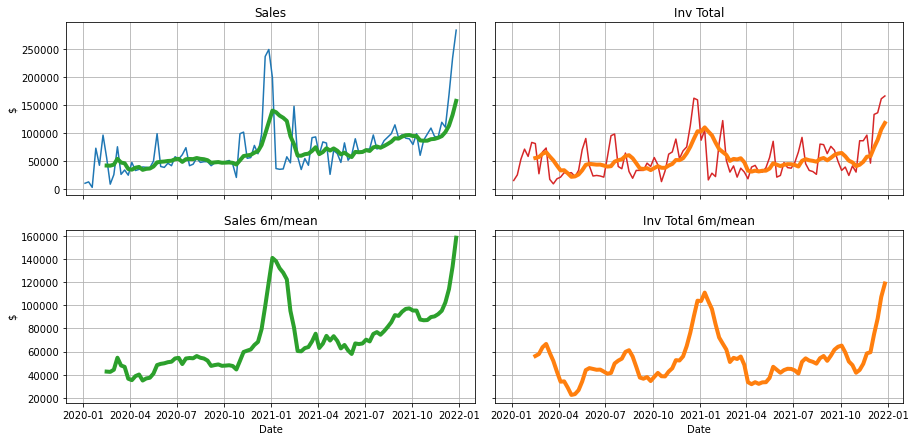

In [29]:
import matplotlib.pyplot as plt
sales = df_inv_med[['Date','Sales']].set_index('Date')
inv = df_inv_med[['Date','invTotal']].set_index('Date')

# sales.plot(grid=True)
# sales.rolling(6).mean().plot(linewidth=4, grid=True)

fig = plt.figure(figsize=(15,7))
gs = fig.add_gridspec(2, 2, hspace=0.2, wspace=0.05)
axs = gs.subplots(sharex='col', sharey='row')

axs[0, 0].plot(sales)
axs[0, 0].plot(sales.rolling(7).mean(), 'tab:green', linewidth=4)
axs[0, 0].set_title('Sales')
axs[0, 0].grid()

axs[0, 1].plot(inv, 'tab:red')
axs[0, 1].plot(inv.rolling(7).mean(), 'tab:orange', linewidth=4)
axs[0, 1].set_title('Inv Total')
axs[0, 1].grid()

axs[1, 0].plot(sales.rolling(7).mean(), 'tab:green', linewidth=4)
axs[1, 0].set_title('Sales 6m/mean')
axs[1, 0].grid()

axs[1, 1].plot(inv.rolling(7).mean(), 'tab:orange', linewidth=4)
axs[1, 1].set_title('Inv Total 6m/mean')
axs[1, 1].grid()

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [30]:
import matplotlib
import statsmodels.api as sm
# decomposition_sales = sm.tsa.seasonal_decompose(sales, model='additive')
# fig = decomposition_sales.plot()
# matplotlib.rcParams['figure.figsize'] = [8, 5]

In [31]:
# decomposition_inv = sm.tsa.seasonal_decompose(inv, model='additive')
# fig = decomposition_inv.plot()
matplotlib.rcParams['figure.figsize'] = [8, 5]

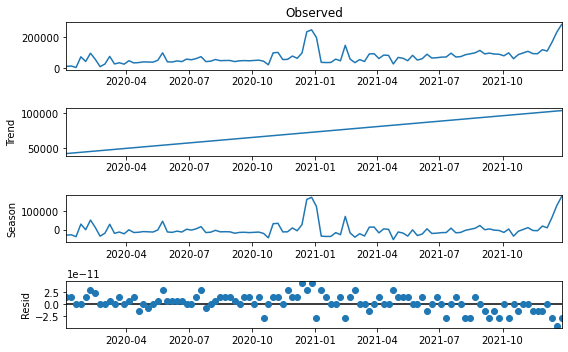

In [32]:
from statsmodels.tsa.seasonal import STL

stl = STL(sales, seasonal=13)
res_sales = stl.fit()
fig = res_sales.plot()

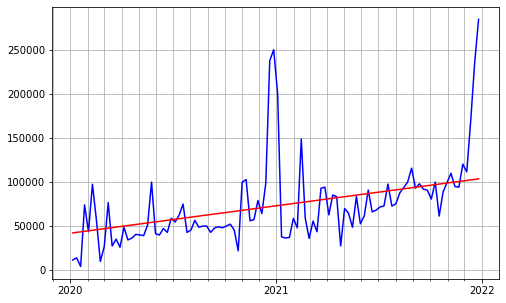

In [33]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(sales, c='blue')
plt.plot(res_sales.trend.index, res_sales.trend, c='red')

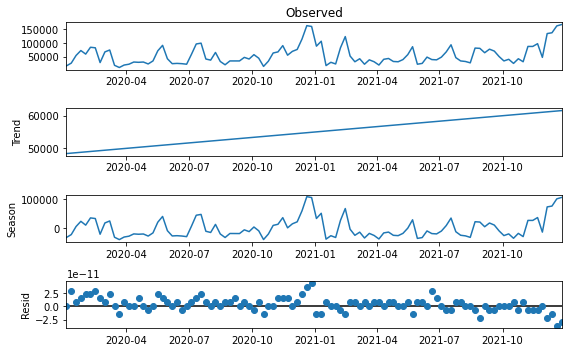

In [34]:
stl = STL(inv, seasonal=13)
res_inv = stl.fit()
fig = res_inv.plot()

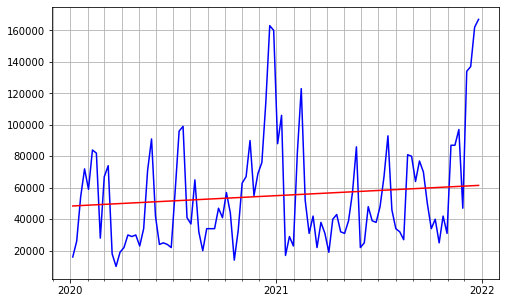

In [35]:
fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(inv, c='blue')
plt.plot(res_inv.trend.index, res_inv.trend, c='red')

In [36]:
res_inv.trend.max()-res_inv.trend.min()

13065.458579881699

In [37]:
res_sales.trend.max()-res_sales.trend.min()

61437.4049556213